In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [117]:
diabetes = pd.read_csv(r"C:\Users\KAsab\Desktop\YOUTUBE R VIDEOS DATASETS\diabetes.csv")

In [118]:
heart = pd.read_csv(r"C:\Users\KAsab\Desktop\YOUTUBE R VIDEOS DATASETS\heart.csv")

In [119]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
np.bincount(diabetes["Outcome"])

array([500, 268], dtype=int64)

In [121]:
diabetes["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [122]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [123]:
y = diabetes["Outcome"]
X = diabetes.iloc[:,:8]

In [124]:
default = pd.read_csv(r"C:\Users\KAsab\Desktop\ALL CSV FILES - 2nd Edition\Default.csv")

In [125]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [126]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [127]:
X = default.iloc[:,1:]
X.head()

,student,balance,income
0,No,729.526495,44361.625074
1,Yes,817.180407,12106.134700
2,No,1073.549164,31767.138947
3,No,529.250605,35704.493935
4,No,785.655883,38463.495879


In [128]:
y = default.iloc[:,0]
y.head()

0    No
1    No
2    No
3    No
4    No
Name: default, dtype: object

In [129]:
y = y.astype("category").cat.codes

In [130]:
y.value_counts()

0    9667
1     333
Name: count, dtype: int64

In [131]:
X.head()

,student,balance,income
0,No,729.526495,44361.625074
1,Yes,817.180407,12106.134700
2,No,1073.549164,31767.138947
3,No,529.250605,35704.493935
4,No,785.655883,38463.495879


In [132]:
num_cols = ["balance","income"]
cat_cols = ["student"]

In [133]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve,auc

In [135]:
ss = StandardScaler()
ohe = OneHotEncoder(sparse_output = False)

In [136]:
ct = make_column_transformer(
    (ohe,cat_cols),
    (ss,num_cols),
    remainder = "drop"
)

In [137]:
ct.set_output(transform = "pandas")

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['student']),
                                ('standardscaler', StandardScaler(),
                                 ['balance', 'income'])])

In [138]:
lr = LogisticRegression()

In [139]:
pipe1 = make_pipeline(ct,lr)

In [140]:
pipe1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['student']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['balance', 'income'])])),
                ('logisticregression', LogisticRegression())])

In [141]:
kf = KFold(n_splits = 10,shuffle = True,random_state = 123)

In [142]:
cv_results = cross_val_score(pipe1,X,y,
                             cv = kf,
                             scoring = "f1",
                            n_jobs = -1)

In [173]:
cv_results.mean()

0.42872918987328135

In [174]:
cv_results

array([0.29268293, 0.5       , 0.39130435, 0.44444444, 0.35      ,
       0.36734694, 0.44      , 0.57692308, 0.52459016, 0.4       ])

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 123)

In [146]:
ct.fit(X_train)

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['student']),
                                ('standardscaler', StandardScaler(),
                                 ['balance', 'income'])])

In [147]:
X_train_std = ct.transform(X_train)
X_test_std = ct.transform(X_test)

In [148]:
pipe2 = make_pipeline(ct,lr)

In [149]:
pipe2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['student']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['balance', 'income'])])),
                ('logisticregression', LogisticRegression())])

In [150]:
cv_results2 = cross_val_score(pipe2,X,y,
                             cv = kf,
                             scoring = 'accuracy',
                             n_jobs = -1)

In [151]:
from sklearn.dummy import DummyRegressor
from sklearn.datasets import load_wine


In [152]:
wine = load_wine()

In [153]:
X,y = wine.data,wine.target

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)

In [155]:
dummy = DummyRegressor(strategy = "mean")

In [156]:
dummy.fit(X_train,y_train)

DummyRegressor()

In [157]:
dummy.score(X_test,y_test)

-0.0480213580840978

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
ols = LinearRegression()

In [160]:
ols.fit(X_train,y_train)

LinearRegression()

In [161]:
ols.score(X_test,y_test)

0.8043532631769537

In [162]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier

In [163]:
iris = load_iris()

In [164]:
X,y = iris.data,iris.target

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [166]:
dummy = DummyClassifier(strategy = "uniform",random_state = 1)
# uniform generates a 50-50 predictions for both classes
# strategy = "stratified" makes predictions proportional to the class proportions of the training set's target vector

In [167]:
dummy.fit(X_train,y_train)

DummyClassifier(random_state=1, strategy='uniform')

In [168]:
dummy.score(X_test,y_test)

0.42105263157894735

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
rfc = RandomForestClassifier()

In [171]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [172]:
rfc.score(X_test,y_test)

0.9736842105263158

In [178]:
from sklearn.metrics import accuracy_score

In [179]:
y_hat = lr.fit(X_train,y_train).predict(X_test)

In [182]:
accuracy_score(y_test,y_hat)

0.9736842105263158

### Evaluating Binary Classifier Threshholds

In [183]:
from sklearn.metrics import roc_curve,roc_auc_score

In [184]:
default = pd.read_csv(r"C:\Users\KAsab\Desktop\ALL CSV FILES - 2nd Edition\Default.csv")

In [185]:
X = default.iloc[:,1:]

In [187]:
y = default.iloc[:,0].astype("category").cat.codes

In [ ]:
num_cols = ["balance","income"]
cat_cols = ["student"]

In [189]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 123)

In [198]:
ss = StandardScaler()
ohe = OneHotEncoder(sparse_output = False)

In [199]:
ct1 = make_column_transformer(
    (ohe,cat_cols),
    (ss,num_cols),
    remainder = "drop"
)

In [200]:
ct1.set_output(transform = "pandas")

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['student']),
                                ('standardscaler', StandardScaler(),
                                 ['balance', 'income'])])

In [201]:
ct1.fit(X_train)

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['student']),
                                ('standardscaler', StandardScaler(),
                                 ['balance', 'income'])])

In [202]:
pipe = make_pipeline(ct1,lr)

In [203]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['student']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['balance', 'income'])])),
                ('logisticregression', LogisticRegression())])

In [211]:
y_probs = pipe.predict_proba(X_test)

In [212]:
y_probs_pos = y_probs[:,1]

In [213]:
fpr,tpr,threshold = roc_curve(y_test,y_probs_pos)

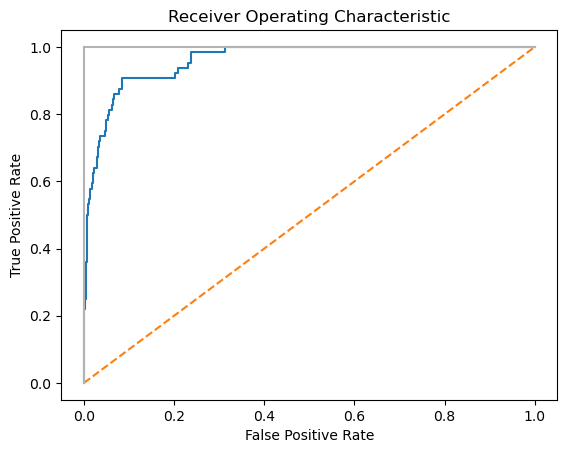

In [236]:
plt.plot(fpr,tpr)
plt.plot([0,1],linestyle = "dashed")
plt.plot([0,0],[1,0], c = "0.7")
plt.plot([1,1], c= "0.7")
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [237]:
pipe.classes_

array([0, 1], dtype=int8)

In [240]:
y_probs[0:1]

array([[9.99473976e-01, 5.26024438e-04]])

In [241]:
roc_auc_score(y_test,y_probs_pos)

0.96021920196281

In [242]:
iris = pd.read_csv(r"C:\Users\KAsab\Downloads\Iris.csv")

In [243]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [248]:
X = iris.iloc[:,1:5]
y = iris.iloc[:,-1].astype("category").cat.codes

In [247]:
num_cols = X.columns.tolist()
print(num_cols)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [250]:
ss = StandardScaler()

In [251]:
logit = LogisticRegression()

In [252]:
ct = make_column_transformer(
    (ss,num_cols),
    remainder = "drop"
)

In [253]:
ct.set_output(transform = "pandas")

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['SepalLengthCm', 'SepalWidthCm',
                                  'PetalLengthCm', 'PetalWidthCm'])])

In [254]:
ct.fit(X)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['SepalLengthCm', 'SepalWidthCm',
                                  'PetalLengthCm', 'PetalWidthCm'])])

In [255]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 123)

In [256]:
pipe = make_pipeline(ct,logit)

In [257]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['SepalLengthCm',
                                                   'SepalWidthCm',
                                                   'PetalLengthCm',
                                                   'PetalWidthCm'])])),
                ('logisticregression', LogisticRegression())])

In [258]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['SepalLengthCm',
                                                   'SepalWidthCm',
                                                   'PetalLengthCm',
                                                   'PetalWidthCm'])])),
                ('logisticregression', LogisticRegression())])

In [259]:
cross_val_score(pipe,X,y,scoring = "f1_macro")

array([0.96658312, 1.        , 0.93265993, 0.89974937, 1.        ])

In [276]:
iris["Species"]=iris["Species"].str.split("-").str.get(1)

In [260]:
from sklearn.metrics import confusion_matrix

In [277]:
class_names = iris["Species"].unique().tolist()

In [278]:
print(class_names)

['setosa', 'versicolor', 'virginica']


In [280]:
y_preds = pipe.predict(X_test)

In [281]:
conf_matrix = confusion_matrix(y_test,y_preds)

In [284]:
conf_matrix

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]], dtype=int64)

In [282]:
df = pd.DataFrame(conf_matrix,index = class_names,columns = class_names)

In [285]:
df

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,6,0
virginica,0,1,10


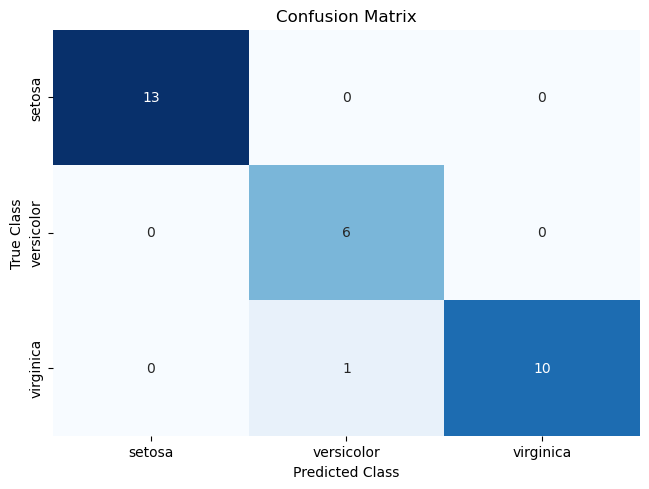

In [288]:
sns.heatmap(df,annot = True,cbar = None,cmap = "Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()